# Welcome to the PAVICS's JupyterLab

This is Ouranos' JupyterLab server for the PAVICS platform. PAVICS is a climate science gateway hosting both climate data and analytical services:
- NetCDF datasets: [THREDDS Data Server](https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/)
- Geospatial layers: [GeoServer](https://pavics.ouranos.ca/geoserver)
- Climate indicators: [Finch](https://pavics.ouranos.ca/twitcher/ows/proxy/finch/)
- Hydrological modeling: [Raven](https://pavics.ouranos.ca/twitcher/ows/proxy/raven/)
- Experimental utilities: [FlyingPigeon](https://pavics.ouranos.ca/twitcher/ows/proxy/flyingpigeon/)

These servers are intended to be accessed through a programming environment. More precisely, analytical services can be accessed through a Web Processing Services (WPS) Application programming interface (API). To facilitate the integration of these WPS processes into typical scientific workflows, we suggest using the high-level Python client library (`birdy.WPSClient`). 

The public demo account on the login page of this JupyterLab is not meant as a production environment. It is a public account with no private directory and limited computing resources. Your files are public, can be seen by the rest of the world and can be reset at anytime. Use it to explore the system's capability and see whether it may be useful to your work.

You can request personal account by contacting the email on the login page.  With a personal account, you will have a production environment with private workspace and no computing resource limitation.

## Example: Computing a climate index at a given coordinate

In [1]:
%matplotlib inline
# Open the connection to the WPS server
from birdy import WPSClient
wps = WPSClient('https://pavics.ouranos.ca/twitcher/ows/proxy/finch/')

In [2]:
# Launch the process extracting the daily time series from a grid point
url = "https://pavics.ouranos.ca/thredds/dodsC/birdhouse/"\
      "cmip5/MRI/rcp85/day/atmos/r1i1p1/pr/pr_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231.nc"
resp = wps.subset_gridpoint(url, -108, 45, variable='pr')

In [3]:
# Inspect the response
reference, meta = resp.get()
print(reference)

https://pavics.ouranos.ca/wpsoutputs/a1652284-c03d-11e9-a6ff-0242ac12000c/pr_day_MRI-CGCM3_rcp85_r1i1p1_20060101-20151231_sub.nc


The output of the process is stored on the server. You may reuse this link as an input to another process, or open it locally. 

In [4]:
pr, meta = resp.get(asobj=True)
pr

<xarray.Dataset>
Dimensions:  (time: 3652)
Coordinates:
    lon      float64 ...
  * time     (time) datetime64[ns] 2006-01-01T12:00:00 ... 2015-12-31T12:00:00
    lat      float64 ...
Data variables:
    pr       (time) float32 ...
Attributes:
    institution:                     MRI (Meteorological Research Institute, ...
    institute_id:                    MRI
    experiment_id:                   rcp85
    source:                          MRI-CGCM3 2011 atmosphere: GSMUV (gsmuv-...
    model_id:                        MRI-CGCM3
    forcing:                         GHG, SA, Oz, LU, Sl, Vl, BC, OC (GHG inc...
    parent_experiment_id:            historical
    parent_experiment_rip:           r1i1p1
    branch_time:                     56978.0
    contact:                         Seiji Yukimoto (yukimoto@mri-jma.go.jp)
    history:                         Output from /sharex2/cmip5/rcp85/run-C3_...
    references:                      Model described by Yukimoto et al. (Tech...
    i

Now let's use the precipitation time series stored on the server to compute the maximum annual daily precipitation.

In [5]:
resp_rx1 = wps.rx1day(reference)

In [6]:
rx1, meta = resp_rx1.get(asobj=True)

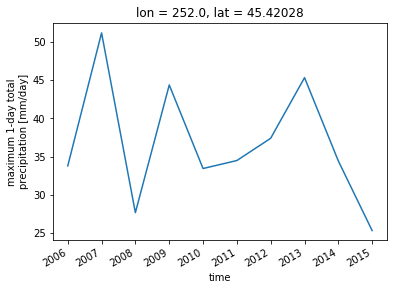

In [7]:
import xarray as xr
xr.plot.utils.register_pandas_datetime_converter_if_needed()
rx1.rx1day.plot()

## Next steps

Want to check out what other neat stuff it can do ? The `help` function will get you the description of each process available (`help(wps.rx1day)`). The code in this notebook will work from your laptop, provided you install the following: 
```
pip install birdhouse-birdy xarray matplotlib
```

If you have any problem, check out the [documentation](https://pavics-sdi.readthedocs.io/en/latest/) or open an [issue] (https://github.com/Ouranosinc/pavics-sdi/issues).

Note that you may use the services over any netCDF file, whether it sits on your computer or another server. It will simply be downloaded to the PAVICS server before the process is launched. 

We're diligently working on improving the services offered and growing the data co-located with the services. Some aspects of the gateway are mature, while others are in development, so be aware that you might hit roadblocks along the way. Don't hesitate to provide feedback at pavics@ouranos.ca. 

## Credits

The PAVICS platform is developed and maintained by Ouranos, the Centre de Recherche Informatique de Montréal and the German Climate Computing Center (DKRZ). It is part of [birdhouse](https://birdhouse.readthedocs.io), a software stack built by an international community motivated by free public access to climate data and services. The platform's development was funded by the [CANARIE](https://canarie.ca) research software program and the [Canadian Center for Climate Services](https://www.canada.ca/en/environment-climate-change/services/climate-change/canadian-centre-climate-services.html).  